In [4]:
#import libraries
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import numpy as np
# from matplotlib.pyplot import figure

In [5]:
repos = pd.read_csv("/home/bm7mp/git/oss-2020/Pydata/repo_slugs.csv")

In [3]:
repos["slug"].describe()

count                     28245840
unique                     1963408
top       lopesdiego12/Hello-World
freq                        198720
Name: slug, dtype: object

In [4]:
repos.head(5)

,Unnamed: 0,slug,language,bytes,created_at,login,commits,additions,deletions
0,0,0000marcosg/bordes,etag,0,2018-11-04 18:48:59,0000marcosg,5,1335,3
1,1,0000sir/larger-neural-style,shell,2730,2016-10-12 11:19:59,SafariMonkey,1,1,1
2,2,0000sir/larger-neural-style,shell,2730,2016-10-12 11:19:59,ProGamerGov,34,314,71
3,3,0000sir/larger-neural-style,shell,2730,2016-10-12 11:19:59,0000sir,12,303,35
4,4,0000sir/vanGogh,javascript,1201,2016-09-01 03:11:43,0000sir,2,23,0


# How many repos have language data?

In [6]:
language_per_repo.loc[language_per_repo!=0].count()

NameError: name 'language_per_repo' is not defined

## Histogram of language used in the repos

In [3]:
# #create count plot for room types
# %matplotlib inline
# # from matplotlib.pyplot import figure
# plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
# sns.set(style="darkgrid")
# ax = sns.countplot(x='language', data=repos,
#                    order = repos['language'].value_counts().indbex)
# ax.set(xlabel='Language', ylabel='Repo count')
# plt.xticks(rotation=70)
# plt.tight_layout()
# plt.show()
# plt.savefig('no_language_per_repo.png')

Another way to plot 5 first popular language:
    

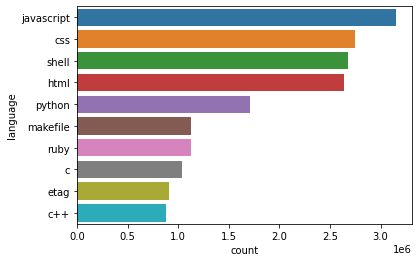

In [10]:
sns.countplot(y="language", data=repos,
              order = repos['language'].value_counts().iloc[:10].index)
plt.savefig('no_language_per_repo_top10.png')

# What is the distribution of repos that have multiple languages?

In [6]:
rep_no_language = repos.groupby("slug")["language"].nunique()

In [7]:
#One_languege_perrepo = repos.groupby("slug")

In [8]:
One_languege_repos = repos[repos.groupby('slug').language.transform('count')<2].copy() #70 percent of the data has one langue per repo

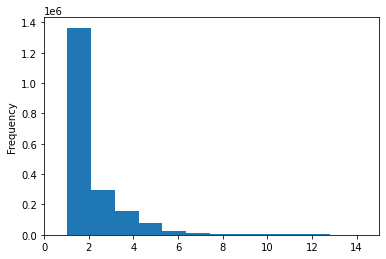

In [11]:
rep_no_language.plot.hist(bins = 200, xlim=(0,15))
plt.savefig('no_repos_no_unique_langs.png')

# What is the distribution of bytes per language?

In [12]:
Most_popular_languages = repos.groupby("language")["bytes"].count().nlargest(10)

In [13]:
Languages = Most_popular_languages.index

In [14]:
for l in Languages:
    print(l)

javascript
css
shell
html
python
makefile
ruby
c
etag
c++


In [15]:
# plt.figure(figsize=(15,6))
# for l in Languages:
#     py = g.get_group(l)
#     plt.hist(py.bytes, histtype='stepfilled', bins=50, alpha=0.2,
#              label=l+" bytes",  density=True)
#     plt.legend(loc="upper left")
# plt.savefig('bytes_lang_hist.png')

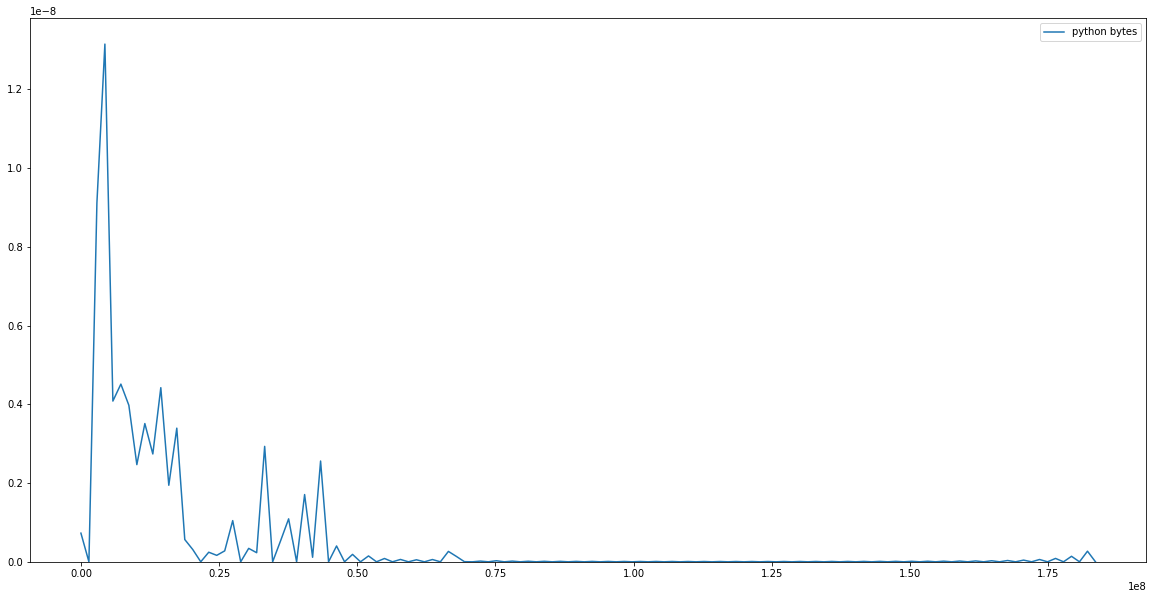

In [16]:

## This block of code is copied from Student240's answer:
import random 



###split the data into groups based on types
g = repos.groupby('language')

## From here things change as I make use of the seaborn library
python = g.get_group('python')
fig, ax = plt.subplots(figsize=(20, 10))

ax = sns.kdeplot(data=python['bytes'], label='python bytes', ax=ax)

plt.savefig('bytes_py_density.png')
plt.show()

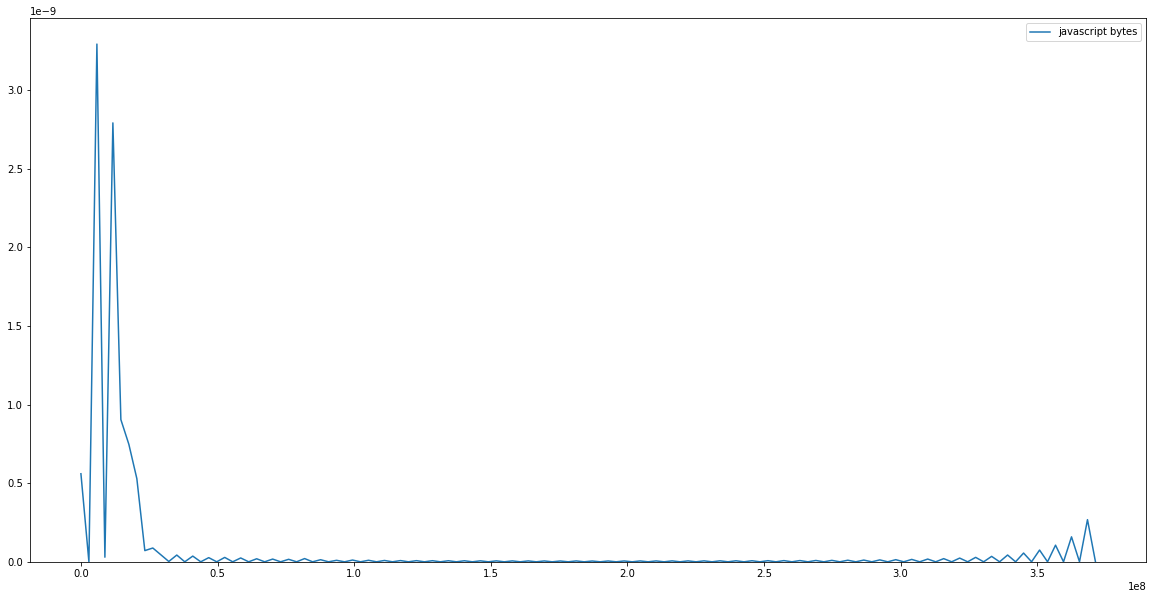

In [17]:

## This block of code is copied from Student240's answer:
import random 


###split the data into groups based on types
g = repos.groupby('language')

## From here things change as I make use of the seaborn library
javascript = g.get_group('javascript')
fig, ax = plt.subplots(figsize=(20, 10))

ax = sns.kdeplot(data=javascript['bytes'], label='javascript bytes', ax=ax)

plt.savefig('bytes_java_density.png')
plt.show()

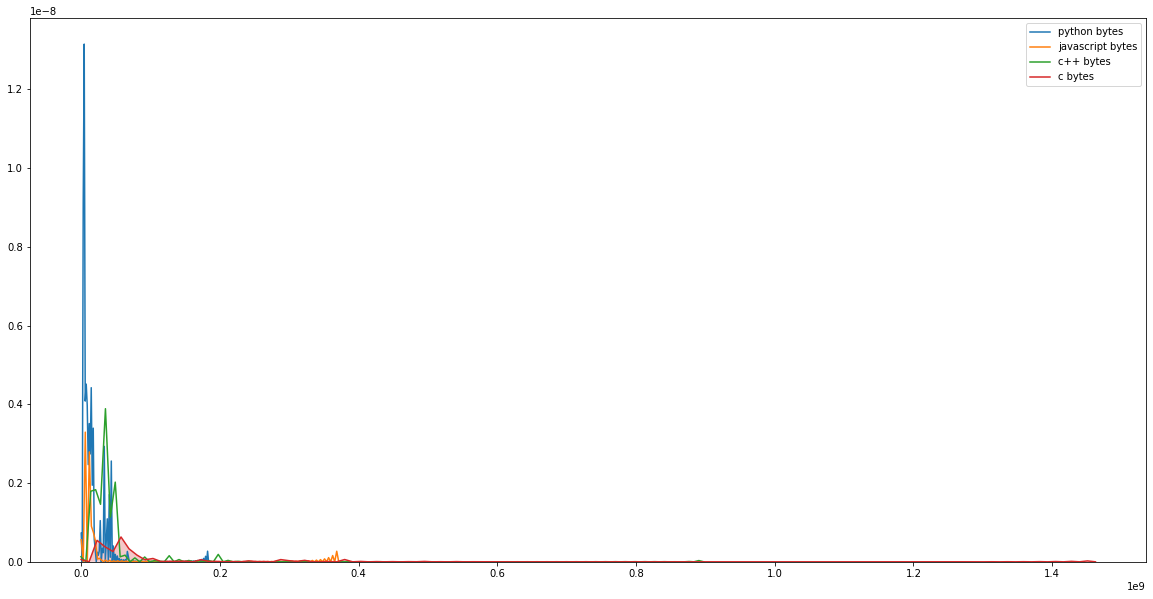

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns



## This block of code is copied from Student240's answer:
import random 
###split the data into groups based on types
g = repos.groupby('language')   

## From here things change as I make use of the seaborn library
python = g.get_group('python')
javascript = g.get_group('javascript')
c = g.get_group('c')
cplus = g.get_group('c++')
fig, ax = plt.subplots(figsize=(20, 10))

ax = sns.kdeplot(data=python['bytes'], label='python bytes', ax=ax)
ax = sns.kdeplot(data=javascript['bytes'], label='javascript bytes', ax=ax)
ax = sns.kdeplot(data=cplus['bytes'], label='c++ bytes', ax=ax)

# for this final one I use the shade option just to show how it is done:
ax = sns.kdeplot(data=c['bytes'], label='c bytes', ax=ax, shade=True)

# ax.set_xtitle('Count')
# ax.set_ytitle('Density')
# ax.set_title('KDE plot example from seaborn')
plt.savefig('bytes_lang_density.png')

# What is the distribution of communities that have multiple languages?

In [9]:
# new data frame with split value columns
new = One_languege_repos["slug"].str.split("/",expand = True)
  
# making separate contributor column from new data frame 

One_languege_repos["Repo"]= new[1]

In [10]:
Membership_LRN = pd.read_pickle("mem_luv_rnbrw.pickle")
CNM = pd.read_pickle('CNM.pkl')
louvain = pd.read_pickle("memdict_risolate.pickle") 
#dictionary with key:0,1,.. membership and value is list of users
Membership_LRN_rev = {val: key for key in Membership_LRN for val in Membership_LRN[key]}
# Membership_LRN_rev: key: slugs, value: membership
CNM_rev = {val: key for key in CNM for val in CNM[key]}
Louvain_rev = {val: key for key in louvain for val in louvain[key]}

In [11]:
One_languege_repos['Membership'] = One_languege_repos['login'].map(Membership_LRN_rev)

In [12]:
One_languege_repos['CNM'] = One_languege_repos['login'].map(CNM_rev)

In [13]:
One_languege_repos['Louvain'] = One_languege_repos['login'].map(Louvain_rev)

In [14]:
#only community with more than 2 members

In [15]:
One_languege_repos_m = One_languege_repos[One_languege_repos.groupby('Membership').login.transform('count')>1].copy() # keep communities with groups with more than one member, 70%

In [16]:
One_languege_repos_cnm = One_languege_repos[One_languege_repos.groupby('CNM').login.transform('count')>1].copy() # keep communities with groups with more than one member, 70%

In [17]:
One_languege_repos_Louvain = One_languege_repos[One_languege_repos.groupby('Louvain').login.transform('count')>1].copy() # keep communities with groups with more than one member, 70%

In [18]:
repos['Membership'] = repos['login'].map(Membership_LRN_rev)

In [19]:
repos['CNM'] = repos['login'].map(CNM_rev)

In [20]:
repos['Louvain'] = repos['login'].map(Louvain_rev)

In [21]:
repos_m = repos[repos.groupby('Membership').login.transform('count')>1].copy() # keep communities with groups with more than one member, all

In [22]:
repos_cnm = repos[repos.groupby('CNM').login.transform('count')>1].copy() # keep communities with groups with more than one member, all

In [23]:
repos_Louvain =  repos[repos.groupby('Louvain').login.transform('count')>1].copy() # keep communities with groups with more than one member, al

In [24]:
One_languege_repos_m.head(10).dropna()

,Unnamed: 0,slug,language,bytes,created_at,login,commits,additions,deletions,Repo,Membership,CNM,Louvain
22,22,00091701/WebChangedNotification-Mono,c#,15828,2016-02-03 12:09:32,DavidHoffmann,1,2,0,WebChangedNotification-Mono,3.0,3.0,11.0
56,56,000paradox000/python_password,python,1073,2016-02-03 12:10:00,000paradox000,1,734,0,python_password,9.0,52347.0,3.0
81,81,00111000/Tic-Tac-Toe,python,14953,2016-09-01 12:03:28,00111000,6,5,5,Tic-Tac-Toe,0.0,0.0,9.0
627,627,00benallen/Deep,java,55408,2015-10-09 20:52:44,00benallen,25,3758,1295,Deep,123000.0,135402.0,123216.0
628,628,00benallen/swift-business-processor,swift,6092,2018-09-03 01:46:26,00benallen,11,2697,591,swift-business-processor,123000.0,135402.0,123216.0
757,757,00firestar00/QueryBuilder,java,19235,2016-02-03 12:16:03,00firestar00,3,943,41,QueryBuilder,5.0,5.0,3.0
945,945,00willo/ipa-scripts,python,1486,2016-02-03 12:18:09,00willo,3,396,0,ipa-scripts,13.0,1.0,7.0
946,946,00willo/nsmnow,shell,306607,2016-02-03 12:18:08,00willo,10,21871,380,nsmnow,13.0,1.0,7.0
951,951,01000101/cloudify-vultr-plugin,python,7514,2016-02-03 12:19:20,01000101,8,482,110,cloudify-vultr-plugin,1.0,1.0,4.0
952,952,01000101/insteon-75790-recorder,javascript,8058,2015-10-09 20:53:07,01000101,11,708,71,insteon-75790-recorder,1.0,1.0,4.0


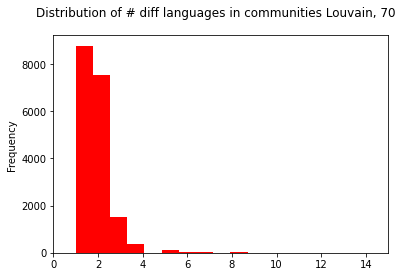

In [28]:
rep_mem_language = One_languege_repos_Louvain.groupby("Louvain")["language"].nunique()
rep_mem_language.plot.hist(bins = 200,color = "RED", xlim=(0,15))
plt.suptitle("Distribution of # diff languages in communities Louvain, 70")

plt.savefig('no_mem_no_unique Louvain_langs.png')


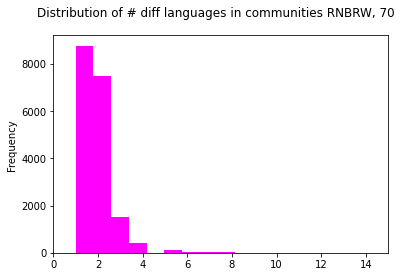

In [39]:
rep_mem_language = One_languege_repos_m.groupby("Membership")["language"].nunique()
rep_mem_language.plot.hist(bins = 200,color = "magenta", xlim=(0,15))
plt.suptitle("Distribution of # diff languages in communities RNBRW, 70")

plt.savefig('no_mem_no_unique rnbrw_langs.png')

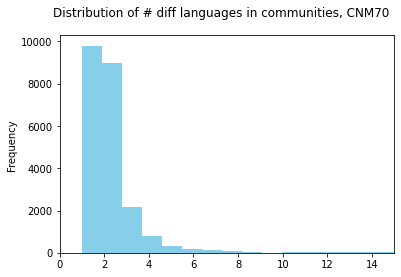

In [38]:
rep_mem_language = One_languege_repos_cnm.groupby("CNM")["language"].nunique()
rep_mem_language.plot.hist(bins = 200,color = "skyblue", xlim=(0,15))
plt.suptitle("Distribution of # diff languages in communities, CNM70")

plt.savefig('no_mem_no_unique_langscnm.png')

In [46]:
rep_mem_language 

Membership
0.0          2156
1.0          9408
2.0          7041
3.0          3827
4.0         10776
            ...  
275058.0        1
275063.0        1
275075.0        1
275079.0        1
275080.0        1
Name: login, Length: 59484, dtype: int64

Text(0.5, 0.98, 'Distribution of # diff languages in communities, all')

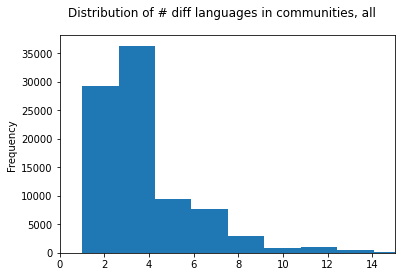

In [336]:
rep_mem_langu_m=repos_m.groupby("Membership")["language"].nunique()
rep_mem_langu_m.plot.hist(bins = 200, xlim=(0,15))
plt.savefig('no_mem_no_unique_langm.png')
plt.suptitle("Distribution of # diff languages in communities, all")

## Step0:look at all the lang and repos, porportion as an explatory step, removes repo

## Step 1: one lang assignment per user with all and 70% of the data

## Step 2: Multi lang assignment per user with all and 70% of the data

# Single languge assignment to users rule

## Rule1: Langueges_byte, multi threshold on # of bytes

## Rule2: Langueges_commit, multi: threshold on # of commit

## Rule 3: Lang_majority, multi, threshold on # of lang

## Rule4: Ownership and go by max bytes, for the multi lang byte threshold

Note: remove commuities with single users and two users

# Step 0:

In [7]:
news = repos_m["slug"].str.split("/",expand = True)
  
# making separate contributor column from new data frame 
repos_m["Repo"]= news[1] 

NameError: name 'repos_m' is not defined

In [59]:
Membership_LRN = pd.read_pickle("mem_luv_rnbrw.pickle")
#dictionary with key:0,1,.. membership and value is list of users
Membership_LRN_rev = {val: key for key in Membership_LRN for val in Membership_LRN[key]}
# Membership_LRN_rev: key: slugs, value: membership

In [63]:
repos_m['Membership'] = repos_m['login'].map(Membership_LRN_rev)

In [ ]:
len(repos['Membership'])

In [ ]:
step_0 = repos_m[['login', 'language', 'Membership']].dropna()

In [ ]:
step_0.head(100)

In [35]:
len(step_0["login"])

15096290

# Step1, single Languge assignement (all+70%):

## Step1-rule1: number of Langueges_byte:

In this section, I want to assign a language to a user. I had to drift-off of both rulesets: (i) number of times a language is used in different repos, (ii) number of commits; due to the number of ties and not abling to assign one lanhguage. 

For now, let us choose the number of bytes used in the language to choose and assign it to the user.

In [64]:
# repos['max_bytes'] = repos.groupby(["login","language"])['bytes'].transform(max)

In [29]:
One_languege_repos_m['max_bytes_user'] = One_languege_repos_m.groupby(["login","language"])['bytes'].transform(max)# 70%

In [30]:
repos_m['max_bytes_user'] = repos_m.groupby(["login","language"])['bytes'].transform(max)                         # all

In [31]:
repos_lang = One_languege_repos_m.loc[One_languege_repos_m['bytes']==One_languege_repos_m['max_bytes_user']]# 70%

In [32]:
repos_lang_all =repos_m.loc[repos_m['bytes']==repos_m['max_bytes_user']]#all

In [35]:
step1_rule1_70_bytes = repos_lang[['login', 'language', 'Membership']].dropna()# 70

In [37]:
step1_rule1_all_bytes = repos_lang_all[['login', 'language', 'Membership']].dropna()#all

In [38]:
step1_rule1_70_bytes.head(100)# 70 

,login,language,Membership
22,DavidHoffmann,c#,3.0
56,000paradox000,python,9.0
81,00111000,python,0.0
627,00benallen,java,123000.0
628,00benallen,swift,123000.0
...,...,...,...
11089,0x1fff,shell,39644.0
11092,0x1fff,perl,39644.0
11203,0x2aff,shell,6.0
11249,0x3333,dart,2.0


In [39]:
step1_rule1_all_bytes.head(100) #all

,login,language,Membership
17,DavidHoffmann,c#,3.0
35,000paradox000,css,9.0
36,000paradox000,tex,9.0
46,000paradox000,html,9.0
60,mukko,apacheconf,271077.0
...,...,...,...
616,007-surajit,javascript,210931.0
617,007-surajit,html,210931.0
627,00benallen,java,123000.0
628,00benallen,swift,123000.0


In [58]:
step1_rule1_70_bytes.shape

(131051, 3)

In [59]:
len(step1_rule1_70_bytes['Membership'].unique())

18418

In [40]:
step1_rule1_70_bytes_group_mem=step1_rule1_70_bytes.groupby(['Membership'])['language'].nunique()
step1_rule1_all_bytes_group_mem=step1_rule1_all_bytes.groupby(['Membership'])['language'].nunique()

Text(0.5, 0.98, 'Distribution of # diff languages by rul1-1 in communities, 70')

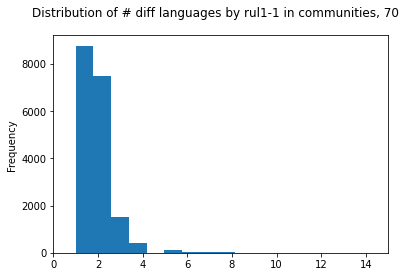

In [338]:
step1_rule1_70_bytes_group_mem.plot.hist(bins = 200, xlim=(0,15))#70
plt.savefig('step1_rule1_70_bytes_lang_mem.png')
plt.suptitle("Distribution of # diff languages by rul1-1 in communities, 70")


Text(0.5, 0.98, 'Distribution of # diff languagesby rul 1-1 in communities, all')

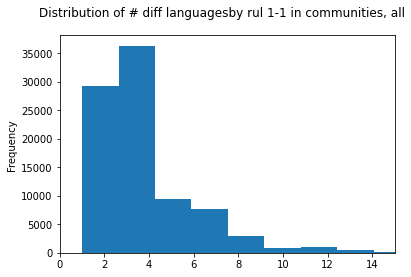

In [337]:
step1_rule1_all_bytes_group_mem.plot.hist(bins = 200, xlim=(0,15))#ALL
plt.savefig('step1_rule1_all_bytes_lang_mem.png')
plt.suptitle("Distribution of # diff languagesby rul 1-1 in communities, all")

### Top 10 lang using step1-rule1 assignement for both 70 persent of the data vs all:

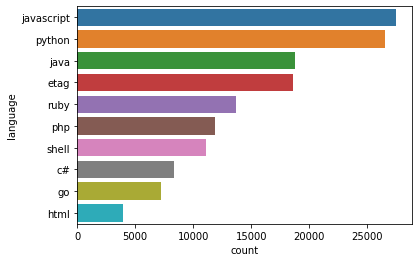

In [50]:
sns.countplot(y="language", data=step1_rule1_70_bytes,
              order = step1_rule1_70_bytes['language'].value_counts().iloc[:10].index)
plt.savefig('language_step1 rule1_70_top10.png')

In [64]:
step1_rule1_70_bytes.value_counts()

login            language    Membership
gcushen          shell       4.0           122
mmathieum        shell       45764.0        98
piotrekkaminski  php         6.0            35
kentcollins      java        97047.0        26
liangzan         javascript  1.0            25
                                          ... 
mishok13         emacs lisp  9.0             1
                 clojure     9.0             1
misho104         perl        13.0            1
misho-kr         shell       13.0            1
0                javascript  1.0             1
Length: 190213, dtype: int64

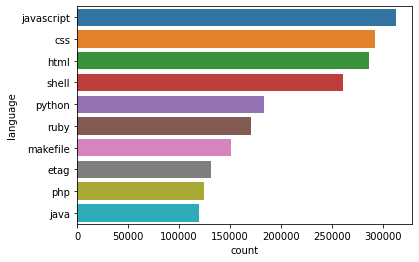

In [49]:
sns.countplot(y="language", data=step1_rule1_all_bytes,
              order = step1_rule1_all_bytes['language'].value_counts().iloc[:10].index)
plt.savefig('language_step1 rule1_all_top5.png')

In [70]:
One_languege_repos_m.loc[One_languege_repos_m.login=='gcushen']#70

,Unnamed: 0,slug,language,bytes,created_at,login,commits,additions,deletions,Repo,Membership,CNM,Louvain,max_bytes_user,max_commit_user
262920,262920,aanjhan/academic-kickstart,shell,231,2018-08-07 03:06:31,gcushen,21,811,76,academic-kickstart,4.0,42.0,2.0,231,158
321346,321346,AbdulYahya/academic-kickstart,shell,231,2018-09-18 03:41:45,gcushen,23,983,103,academic-kickstart,4.0,42.0,2.0,231,158
340593,340593,abhipatil123/academic-kickstart,shell,231,2018-09-15 14:24:56,gcushen,23,983,103,academic-kickstart,4.0,42.0,2.0,231,158
751688,751688,ajroyer/academic-kickstart,shell,231,2018-09-18 05:11:05,gcushen,23,983,103,academic-kickstart,4.0,42.0,2.0,231,158
832786,832786,alanponce/academic-kickstart,shell,231,2018-10-08 01:41:42,gcushen,24,1083,132,academic-kickstart,4.0,42.0,2.0,231,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27428832,27428832,yacca/academic-kickstart,shell,231,2018-09-20 08:01:54,gcushen,23,983,103,academic-kickstart,4.0,42.0,2.0,231,158
27464329,27464329,yangliustat/mywebsite,shell,231,2018-09-09 19:25:24,gcushen,23,983,103,mywebsite,4.0,42.0,2.0,231,158
27705103,27705103,yueruchen/academic-kickstart,shell,231,2018-07-31 22:09:37,gcushen,46,1775,720,academic-kickstart,4.0,42.0,2.0,231,158
28022157,28022157,Zhu-Justin/academic-kickstart,shell,231,2018-09-07 13:29:09,gcushen,23,983,103,academic-kickstart,4.0,42.0,2.0,231,158


## Ste1-Rule2: number of Langueges_commit (70%-all)

In [241]:
#number_of_communities = len(repos_lang['Membership'].unique())
#print(number_of_communities)

In [240]:
#number_of_communities_all = len(repos_lang_all['Membership'].unique())
#print(number_of_communities)

In [51]:
One_languege_repos_m['max_commit_user'] = One_languege_repos_m.groupby(["login","language"])['commits'].transform(max) #70

In [52]:
repos_m['max_commit_user'] = repos_m.groupby(["login","language"])['commits'].transform(max) #all

In [53]:
repos_lang_commit = One_languege_repos_m.loc[One_languege_repos_m['commits']==One_languege_repos_m['max_commit_user']]#70

In [54]:
repos_lang_commit_all = repos_m.loc[repos_m['commits']==repos_m['max_commit_user']]#all

In [55]:
Step1_rule2_70_commit = repos_lang_commit[['login', 'language', 'Membership']].dropna()#70

In [56]:
Step1_rule2_commit_all = repos_lang_commit_all[['login', 'language', 'Membership']].dropna()#all

In [57]:
#Step1_rule2_70_commit.head(1000)#70

In [58]:
len(Step1_rule2_70_commit['Membership'])#70

197137

In [59]:
#Step1_rule2_commit_all.head()#all

In [60]:
step1_rule2_70_commit_group_mem=Step1_rule2_70_commit.groupby(['Membership'])['language'].nunique()
step1_rule2_all_commits_group_mem= Step1_rule2_commit_all.groupby(['Membership'])['language'].nunique()

In [48]:
#step1_rule2_70_commit_group_mem

Text(0.5, 0.98, 'Distribution of # diff languages by rul1-2 in communities, 70')

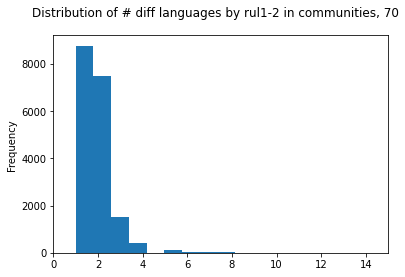

In [370]:
step1_rule2_70_commit_group_mem.plot.hist(bins = 200, xlim=(0,15))#70
plt.savefig('step1_rule2_70_bytes_lang_mem.png')
plt.suptitle("Distribution of # diff languages by rul1-2 in communities, 70")


In [61]:
#step1_rule2_70_commit_group_mem.reset_index()

Text(0.5, 0.98, 'Distribution of # diff languages by rul1-2 in communities, all')

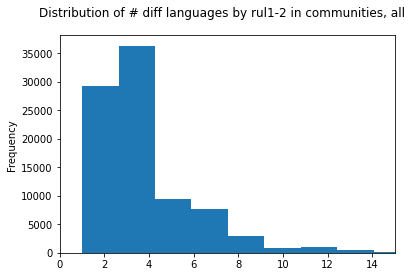

In [343]:
step1_rule2_all_commits_group_mem.plot.hist(bins = 200, xlim=(0,15))#70
plt.savefig('step1_rule2_all_bytes_lang_mem.png')
plt.suptitle("Distribution of # diff languages by rul1-2 in communities, all")

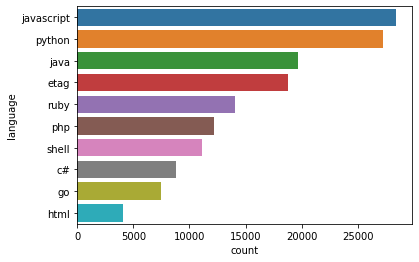

In [80]:
sns.countplot(y="language", data=Step1_rule2_70_commit,
              order = Step1_rule2_70_commit['language'].value_counts().iloc[:10].index)
plt.savefig('language_#community_step1 rule2_70_top10.png')

In [120]:
#step1_rule2_70_commit_group_mem.loc[step1_rule2_70_commit_group_mem.Membership==10]#70

#### Mismatches between rule1 and rule2:

In [145]:
Step1_rule1_vs_rule2 = Step1_rule2_70_commit.merge(step1_rule1_70_bytes, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='both']
# 'left_only','both', 'right_only'

In [146]:
Step1_rule1_vs_rule2

,login,language,Membership,_merge
0,DavidHoffmann,c#,3.0,both
1,000paradox000,python,9.0,both
2,00111000,python,0.0,both
3,00benallen,java,123000.0,both
4,00benallen,swift,123000.0,both
...,...,...,...,...
199723,zzyzy,visual basic,0.0,both
199724,zzz40500,java,8.0,both
199725,zzzap,python,92351.0,both
199726,zzzap,etag,92351.0,both


In [68]:
One_languege_repos_m.loc[One_languege_repos_m.login=='gcushen']#70

,Unnamed: 0,slug,language,bytes,created_at,login,commits,additions,deletions,Repo,Membership,CNM,Louvain,max_bytes_user,max_commit_user
262920,262920,aanjhan/academic-kickstart,shell,231,2018-08-07 03:06:31,gcushen,21,811,76,academic-kickstart,4.0,42.0,2.0,231,158
321346,321346,AbdulYahya/academic-kickstart,shell,231,2018-09-18 03:41:45,gcushen,23,983,103,academic-kickstart,4.0,42.0,2.0,231,158
340593,340593,abhipatil123/academic-kickstart,shell,231,2018-09-15 14:24:56,gcushen,23,983,103,academic-kickstart,4.0,42.0,2.0,231,158
751688,751688,ajroyer/academic-kickstart,shell,231,2018-09-18 05:11:05,gcushen,23,983,103,academic-kickstart,4.0,42.0,2.0,231,158
832786,832786,alanponce/academic-kickstart,shell,231,2018-10-08 01:41:42,gcushen,24,1083,132,academic-kickstart,4.0,42.0,2.0,231,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27428832,27428832,yacca/academic-kickstart,shell,231,2018-09-20 08:01:54,gcushen,23,983,103,academic-kickstart,4.0,42.0,2.0,231,158
27464329,27464329,yangliustat/mywebsite,shell,231,2018-09-09 19:25:24,gcushen,23,983,103,mywebsite,4.0,42.0,2.0,231,158
27705103,27705103,yueruchen/academic-kickstart,shell,231,2018-07-31 22:09:37,gcushen,46,1775,720,academic-kickstart,4.0,42.0,2.0,231,158
28022157,28022157,Zhu-Justin/academic-kickstart,shell,231,2018-09-07 13:29:09,gcushen,23,983,103,academic-kickstart,4.0,42.0,2.0,231,158


## Step 1-Rule3: number of Langueges_Majority_1

In [82]:
Login_lang_majority= One_languege_repos_m.groupby(["login", "language"]).size().to_frame('Lng-count').reset_index().merge(One_languege_repos_m,on=["login", "language"],how='right').fillna(value=0)#70

In [83]:
Login_lang_majority_all=repos_m.groupby(["login", "language"]).size().to_frame('Lng-count').reset_index().merge(repos_m,on=["login", "language"],how='right').fillna(value=0)#all

In [84]:
Login_lang_majority['max-Lang-count']= Login_lang_majority.groupby(["login","language"])['Lng-count'].transform(max)#70

In [85]:
Login_lang_majority_all['max-Lang-count']= Login_lang_majority_all.groupby(["login","language"])['Lng-count'].transform(max)#all

In [86]:
Login_lang_majorit= Login_lang_majority.loc[Login_lang_majority['Lng-count']==Login_lang_majority['max-Lang-count']] #this does not resolve ties, see example below, and reslove#70
#Login_lang_majorit = Login_lang_majorit.reset_index

In [87]:
Login_lang_majorit_doup = Login_lang_majorit.sort_values('bytes', ascending=False).drop_duplicates(subset=["login", 'max-Lang-count'])#70 this resloves above by selecting douplicates on maxlangcount that have max byte

In [88]:
Login_lang_majorit_all= Login_lang_majority_all.loc[Login_lang_majority_all['Lng-count']==Login_lang_majority_all['max-Lang-count']]#all #this does not resolve ties, see example below#all, below reolves
#Login_lang_majorit_all = Login_lang_majorit_all.reset_index()

In [89]:
Login_lang_majorit_doup_all = Login_lang_majorit_all.sort_values('bytes', ascending=False).drop_duplicates(subset=["login", 'max-Lang-count'])#all this resloves above by selecting douplicates on maxlangcount that have max byte

In [90]:
One_languege_repos_m.loc[One_languege_repos_m.login=='0-Eclipse-0']#70

,Unnamed: 0,slug,language,bytes,created_at,login,commits,additions,deletions,Repo,Membership,CNM,Louvain,max_bytes_user,max_commit_user
4637,4637,0-Eclipse-0/EclipseBot,lua,72809,2016-05-01 23:52:18,0-Eclipse-0,9,3433,12,EclipseBot,38.0,2.0,33.0,72809,9
4640,4640,0-Eclipse-0/SaltBot-Python,batchfile,78,2016-02-03 12:00:37,0-Eclipse-0,12,710,14,SaltBot-Python,38.0,2.0,33.0,78,12
4641,4641,0-Eclipse-0/Tic-Tac-Toe,c#,1,2016-02-03 12:00:43,0-Eclipse-0,6,11154,4,Tic-Tac-Toe,38.0,2.0,33.0,1,6


In [92]:
Login_lang_majorit.loc[Login_lang_majorit .login=='0-Eclipse-0']#70 issue

,login,language,Lng-count,Unnamed: 0,slug,bytes,created_at,commits,additions,deletions,Repo,Membership,CNM,Louvain,max_bytes_user,max_commit_user,max-Lang-count
71,0-Eclipse-0,lua,1,4637,0-Eclipse-0/EclipseBot,72809,2016-05-01 23:52:18,9,3433,12,EclipseBot,38.0,2.0,33.0,72809,9,1
72,0-Eclipse-0,batchfile,1,4640,0-Eclipse-0/SaltBot-Python,78,2016-02-03 12:00:37,12,710,14,SaltBot-Python,38.0,2.0,33.0,78,12,1
73,0-Eclipse-0,c#,1,4641,0-Eclipse-0/Tic-Tac-Toe,1,2016-02-03 12:00:43,6,11154,4,Tic-Tac-Toe,38.0,2.0,33.0,1,6,1


In [91]:
Login_lang_majorit_doup .loc[Login_lang_majorit_doup .login=='0-Eclipse-0']#70###YEEESSS, issue fixrd

,login,language,Lng-count,Unnamed: 0,slug,bytes,created_at,commits,additions,deletions,Repo,Membership,CNM,Louvain,max_bytes_user,max_commit_user,max-Lang-count
71,0-Eclipse-0,lua,1,4637,0-Eclipse-0/EclipseBot,72809,2016-05-01 23:52:18,9,3433,12,EclipseBot,38.0,2.0,33.0,72809,9,1


In [93]:
One_languege_repos.loc[One_languege_repos.login=='0-Eclipse-0']

,Unnamed: 0,slug,language,bytes,created_at,login,commits,additions,deletions,Repo,Membership,CNM,Louvain
4637,4637,0-Eclipse-0/EclipseBot,lua,72809,2016-05-01 23:52:18,0-Eclipse-0,9,3433,12,EclipseBot,38.0,2.0,33.0
4640,4640,0-Eclipse-0/SaltBot-Python,batchfile,78,2016-02-03 12:00:37,0-Eclipse-0,12,710,14,SaltBot-Python,38.0,2.0,33.0
4641,4641,0-Eclipse-0/Tic-Tac-Toe,c#,1,2016-02-03 12:00:43,0-Eclipse-0,6,11154,4,Tic-Tac-Toe,38.0,2.0,33.0


In [108]:
#Login_lang_majorit['Membership'] = Login_lang_majorit['login'].map(Membership_LRN_rev)#70

In [109]:
#Login_lang_majorit_all['Membership'] = Login_lang_majorit_all['login'].map(Membership_LRN_rev)#all

In [94]:
#keeping those that we assigned to a community:
Step1_rule3_70_majority = Login_lang_majorit_doup[['login', 'language', 'Membership']].dropna()#70

In [95]:
#keeping those that we assigned to a community:
Step1_rule3_70_majority_all = Login_lang_majorit_doup_all[['login', 'language', 'Membership']].dropna()#all

In [166]:
Step1_rule3_70_majority

,login,language,Membership
77973,DEK11,etag,45719.0
310433,ueef,etag,5582.0
226795,nikogura,etag,20.0
107812,mgernand,etag,17.0
50433,carltongibson,etag,4.0
...,...,...,...
127716,HanSolo,etag,11.0
92647,edwintye,etag,156.0
309580,txhsl,etag,17.0
161344,jordn,etag,9.0


In [113]:
Step1_rule3_70_majority_all.tail(100)#70

,login,language,Membership
12273439,the-noob,etag,9
12273138,klyburke,etag,9
12273139,essuraj,etag,9
12273140,dphrag,etag,9
12273141,maprihoda,etag,9
...,...,...,...
12272794,koshea,etag,9
12272805,matthewcheok,etag,9
12272806,LAITONEN,etag,9
12272791,maxpechenin,etag,9


In [114]:
#rule3_70_majority = pd.merge(Login_lang_majorit,One_languege_repos[['login','language','Membership']],on='login', how='left').dropna()

In [205]:
#rule3_70_majority.head(50)

In [ ]:
step1_rule3_70_group_mem=Step1_rule3_70_majority.groupby(['Membership'])['language'].nunique()
step1_rule3_70_group_mem.plot.hist(bins = 200, xlim=(0,8))#70
plt.savefig('step1_rule3_70_bytes_lang_mem.png')
plt.suptitle("Distribution of # diff languages by rul1-3 in communities, 70")


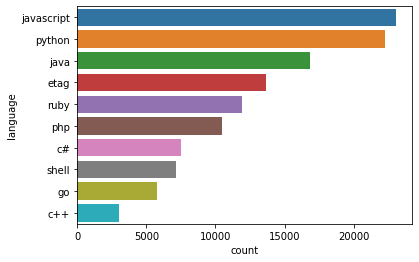

In [96]:
sns.countplot(y="language", data=Step1_rule3_70_majority,
              order = Step1_rule3_70_majority['language'].value_counts().iloc[:10].index)
plt.savefig('language_#community_step1 rule3_70_top10.png')

In [155]:
Step1_rule1_vs_rule3 = Step1_rule3_70_majority.merge(step1_rule1_70_bytes, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='both']
# 'left_only','both', 'right_only'

In [163]:
Step1_rule2_vs_rule3 = Step1_rule2_70_commit.merge(Step1_rule3_70_majority, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='right_only']
# 'left_only','both', 'right_only'

In [165]:
Step1_rule1_vs_rule3

,login,language,Membership,_merge
0,DEK11,etag,45719.0,both
1,ueef,etag,5582.0,both
2,nikogura,etag,20.0,both
3,mgernand,etag,17.0,both
4,carltongibson,etag,4.0,both
...,...,...,...,...
156520,HanSolo,etag,11.0,both
156521,edwintye,etag,156.0,both
156522,txhsl,etag,17.0,both
156523,jordn,etag,9.0,both


## Step1-Rule4: by ownership, only owners be assigned languge_1(70% + all)

In [97]:
# creat a column with owners name#70
new = One_languege_repos_m["slug"].str.split("/",expand = True)
  
# making separate owner column from new data frame #70
One_languege_repos_m["owner"]= new[0] 

In [98]:
# creat a column with owners name#all
new = repos_m["slug"].str.split("/",expand = True)
  
# making separate owner column from new data frame #all
repos_m["owner"]= new[0] 

In [99]:
ownership = One_languege_repos_m.loc[(One_languege_repos_m['owner'] ==One_languege_repos_m['login'])]#70

In [100]:
ownership_all = repos_m.loc[(repos_m['owner'] ==repos_m['login'])]#all

In [101]:
#if owner and login the same, keep the row, or bytes>100, i.e keep all if they own, if they don’t own use rule byte threshold

#repos_ownership = One_languege_repos.loc[(One_languege_repos['owner'] ==One_languege_repos['login']) | (One_languege_repos['bytes'] > 100)]# for multi

In [102]:
ownership['Membership'] = ownership['login'].map(Membership_LRN_rev)#70

/apps/software/standard/compiler/gcc/7.1.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [103]:
ownership_all['Membership'] = ownership_all['login'].map(Membership_LRN_rev)#all

/apps/software/standard/compiler/gcc/7.1.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [104]:
Step1_rule4_70_ownership = ownership[['login', 'language', 'Membership']].dropna()#70

In [105]:
Step1_rule4_70_ownership_all = ownership_all[['login', 'language', 'Membership']].dropna()#all

In [106]:
Step1_rule4_70_ownership.head(100)

,login,language,Membership
56,000paradox000,python,9
81,00111000,python,0
627,00benallen,java,123000
628,00benallen,swift,123000
757,00firestar00,java,5
...,...,...,...
9763,0x00-0x00,shell,4
9764,0x00-0x00,python,4
9794,0x010C,python,1
9805,0x010C,python,1


Text(0.5, 0.98, 'Distribution of # diff languages by rul1-4 in communities, 70')

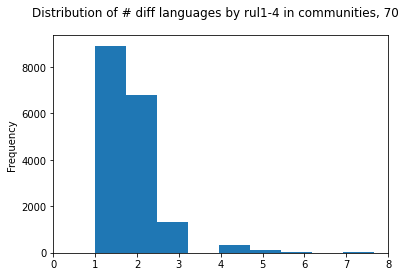

In [126]:
step1_rule4_70_group_mem=Step1_rule4_70_ownership.groupby(['Membership'])['language'].nunique()
step1_rule4_70_group_mem.plot.hist(bins = 200, xlim=(0,8))#70
plt.savefig('step1_rule4_70_lang_mem.png')
plt.suptitle("Distribution of # diff languages by rul1-4 in communities, 70")

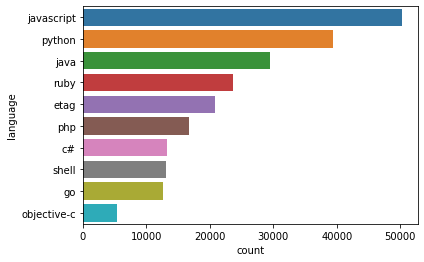

In [107]:
sns.countplot(y="language", data=Step1_rule4_70_ownership,
              order = Step1_rule4_70_ownership['language'].value_counts().iloc[:10].index)
plt.savefig('language_#community_step1 rule3_70_top10.png')

In [ ]:
Step1_rule1_vs_rule3 = Step1_rule3_70_majority.merge(step1_rule1_70_bytes, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='both']

# Step 2, multi-languge assignement:

## Step 2_Rule1: Langueges_byte_2, threshold on # mean/75 quartile byte

In [25]:
One_languege_repos_m['mean_bytes_user'] = One_languege_repos_m.groupby(["login", 'language'])['bytes'].transform("mean")#70

In [26]:
repos_m['mean_bytes_user'] = repos_m.groupby(["login", 'language'])['bytes'].transform("mean")#all

In [27]:
repos_lang_multi = One_languege_repos_m.loc[One_languege_repos_m['bytes']>One_languege_repos_m['mean_bytes_user']]# 70%

In [28]:
repos_lang_multi_all = repos_m.loc[repos_m['bytes']>repos_m['mean_bytes_user']]# all

In [29]:
step2_rule1_70_bytes = repos_lang_multi[['login', 'language', 'Membership']].dropna()# 70

In [80]:
step2_rule1_70_bytes

,login,language,Membership
1003,0101011,etag,19.0
1232,stanzheng,java,0.0
1890,02JanDal,ruby,5.0
2042,bigstark,java,40933.0
2205,0532,java,0.0
...,...,...,...
28230886,zzolo,javascript,9.0
28230949,zzo,javascript,23.0
28241653,zzsza,etag,87114.0
28241655,zzsza,jupyter notebook,87114.0


In [81]:
step2_rule1_all_bytes = repos_lang_multi_all[['login', 'language', 'Membership']].dropna()# all

In [82]:
step2_rule1_all_bytes

,login,language,Membership
17,DavidHoffmann,c#,3
33,000paradox000,python,9
34,000paradox000,javascript,9
46,000paradox000,html,9
47,000paradox000,python,9
...,...,...,...
28245661,ichaobuster,html,318
28245662,balakrishna513,html,318
28245681,benjsmi,dockerfile,318
28245772,zzzzail,javascript,113109


Text(0.5, 0.98, 'Distribution of # diff languages by rul2-1 in communities, 70')

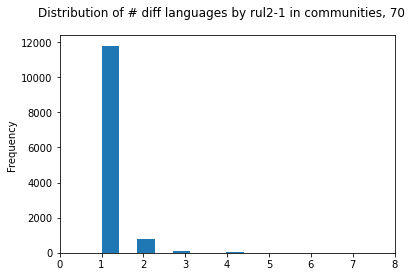

In [86]:
step2_rule1_70_group_mem=step2_rule1_70_bytes.groupby(['Membership'])['language'].nunique()
step2_rule1_70_group_mem.plot.hist(bins = 200, xlim=(0,8))#70
plt.savefig('step2_rule1_70_bytes_lang_mem.png')
plt.suptitle("Distribution of # diff languages by rul2-1 in communities, 70")


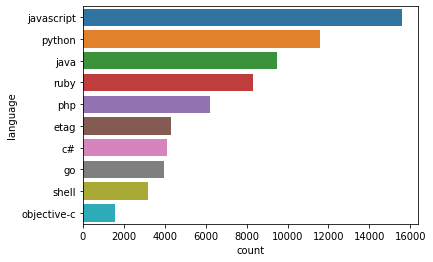

In [30]:
sns.countplot(y="language", data=step2_rule1_70_bytes,
              order = step2_rule1_70_bytes['language'].value_counts().iloc[:10].index)
plt.savefig('language_#community_step2 rule1_70_top10.png')

## Ste2-Rule2: number of Langueges_commit (70%-all)


In [35]:
One_languege_repos_m['mean_commit_user'] = One_languege_repos_m.groupby(["login", 'language'])['commits'].transform('mean') #70

In [36]:
repos_m['mean_commit_user'] = repos_m.groupby(["login", 'language'])['commits'].transform("mean")#all

In [37]:
repos_Lang_commit_multi = One_languege_repos_m.loc[One_languege_repos_m['commits']>One_languege_repos_m["mean_commit_user"]]# 70%

In [38]:
repos_Lang_commit_multi_all = repos_m.loc[repos_m['commits']>repos_m["mean_commit_user"]]# all

In [39]:
step2_rule2_70_commit = repos_Lang_commit_multi [['login', 'language', 'Membership']].dropna()# 70

In [40]:
step2_rule2_70_commit_all = repos_Lang_commit_multi_all [['login', 'language', 'Membership']].dropna()# all

In [41]:
step2_rule2_70_commit .head(100)

,login,language,Membership
1008,0101011,etag,19.0
1232,stanzheng,java,0.0
2205,0532,java,0.0
3775,0918nobita,etag,0.0
4569,0dayZh,objective-c,8.0
...,...,...,...
80546,sfuhrm,java,1.0
81115,1ed,ruby,6.0
81290,yoren,php,18.0
81295,yoren,php,18.0


In [42]:
step2_rule2_70_commit_all .head(100)

,login,language,Membership
17,DavidHoffmann,c#,3.0
31,000paradox000,python,9.0
32,000paradox000,shell,9.0
33,000paradox000,python,9.0
34,000paradox000,javascript,9.0
...,...,...,...
804,pcornelissen,html,11.0
810,sqshq,html,2.0
816,pcornelissen,shell,11.0
822,sqshq,shell,2.0


In [ ]:
step2_rule2_70_group_mem=step2_rule2_70_commit.groupby(['Membership'])['language'].nunique()
step2_rule2_70_group_mem.plot.hist(bins = 200, xlim=(0,8))#70
plt.savefig('step2_rule2_70_bytes_lang_mem.png')
plt.suptitle("Distribution of # diff languages by rul2-2 in communities, 70")

Text(0.5, 0.98, 'Distribution of # diff languages by rul2-2 in communities, 70')

In [ ]:
sns.countplot(y="language", data=step2_rule2_70_commit,
              order = step2_rule2_70_commit['language'].value_counts().iloc[:10].index)
plt.savefig('language_#community_step2 rule2_70_top10.png')

## Step 2-Rule3: number of Langueges_Majority_1

In [191]:
Login_lang_majority_multi=One_languege_repos_m.groupby(["login", "language"]).size().to_frame('Lng-count').reset_index().merge(One_languege_repos_m,on=["login", "language"],how='right').fillna(value=0)#70

In [200]:
Login_lang_majority_multi_all = repos_m.groupby(["login", "language"]).size().to_frame('Lng-count').reset_index().merge(repos_m,on=["login", "language"],how='right').fillna(value=0)#all

In [192]:
Login_lang_majority_multi['mean_Lang_count']= Login_lang_majority_multi.groupby(["login"])['Lng-count'].transform('mean')#70

In [201]:
Login_lang_majority_multi_all['mean_Lang_count']= Login_lang_majority_multi_all.groupby(["login"])['Lng-count'].transform('mean')#all

In [202]:
Login_lang_majority_multi = Login_lang_majority_multi.loc[Login_lang_majority_multi['Lng-count']>Login_lang_majority_multi["mean_Lang_count"]]# 70%

In [170]:
Login_lang_majority_multi_all = Login_lang_majority_multi_all.loc[Login_lang_majority_multi_all['Lng-count']>Login_lang_majority_multi_all["mean_Lang_count"]]# all%

In [203]:
step2_rule3_70_majority = Login_lang_majority_multi [['login', 'language', 'Membership']].dropna()# 70

In [204]:
step2_rule3_70_majority.head(100)

,login,language,Membership
17,stanzheng,java,0.0
18,stanzheng,java,0.0
32,0532,java,0.0
33,0532,java,0.0
34,0532,java,0.0
...,...,...,...
361,123marvin123,java,16.0
362,123marvin123,java,16.0
363,123marvin123,java,16.0
364,123marvin123,java,16.0


In [205]:
step2_rule3_70_majority_all = Login_lang_majority_multi_all [['login', 'language', 'Membership']].dropna()# 70

In [206]:
step2_rule3_70_majority_all.head(100)

,login,language,Membership
0,DavidHoffmann,c#,3
1,DavidHoffmann,c#,3
2,DavidHoffmann,c#,3
3,000paradox000,python,9
4,000paradox000,python,9
...,...,...,...
95,Walkman100,shell,54
96,Walkman100,shell,54
97,Walkman100,shell,54
98,Walkman100,shell,54


Text(0.5, 0.98, 'Distribution of # diff languages by rul2-3 in communities, 70')

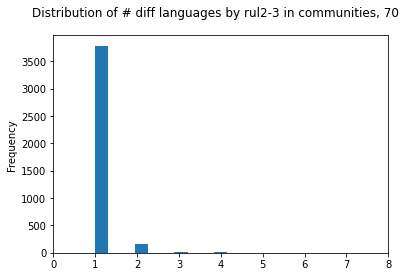

In [197]:
step2_rule3_70_group_mem=step2_rule3_70_majority.groupby(['Membership'])['language'].nunique()
step2_rule3_70_group_mem.plot.hist(bins = 200, xlim=(0,8))#70
plt.savefig('step2_rule3_70_lang_mem.png')
plt.suptitle("Distribution of # diff languages by rul2-3 in communities, 70")

Text(0.5, 0.98, 'Distribution of # diff languages by rul2-3 in communities, all')

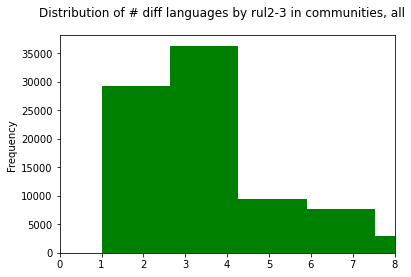

In [210]:
step2_rule3_all_group_mem=step2_rule3_70_majority_all.groupby(['Membership'])['language'].nunique()
step2_rule3_all_group_mem.plot.hist(bins = 200,color='green', xlim=(0,8))#70
plt.savefig('step2_rule3_all_lang_mem.png')
plt.suptitle("Distribution of # diff languages by rul2-3 in communities, all")

## Step2-Rule4: by ownership, _1(70% + all)

In [319]:
#if owner and login the same, keep the row, or bytes>100, i.e keep all if they own, if they don’t own use rule byte threshold

repos_ownership = One_languege_repos_m.loc[(One_languege_repos_m['owner'] ==One_languege_repos_m['login']) | (One_languege_repos_m['bytes'] > One_languege_repos_m['mean_bytes_user'])]#70 for multi

In [322]:
Step2_rule4_70_ownership =repos_ownership[['login', 'language', 'Membership']].dropna()# 70

In [326]:
Step2_rule4_70_ownership.head(100)

,login,language,Membership
56,000paradox000,python,9.0
81,00111000,python,0.0
627,00benallen,java,123000.0
628,00benallen,swift,123000.0
757,00firestar00,java,5.0
...,...,...,...
9707,0V,etag,24.0
9708,0V,c#,24.0
9760,0x00-0x00,python,4.0
9761,0x00-0x00,python,4.0


In [321]:
repos_ownership_all = repos_m.loc[(repos_m['owner'] ==repos_m['login']) | (repos_m['bytes'] > repos_m['mean_bytes_user'])]#all for multi

In [325]:
Step2_rule4_all_ownership =repos_ownership_all[['login', 'language', 'Membership']].dropna()# all

In [324]:
Step2_rule4_all_ownership.head(100)

,login,language,Membership
17,DavidHoffmann,c#,3.0
31,000paradox000,python,9.0
32,000paradox000,shell,9.0
33,000paradox000,python,9.0
34,000paradox000,javascript,9.0
...,...,...,...
273,David-Desmaisons,javascript,24.0
274,pepf,javascript,3.0
276,michalsnik,javascript,24.0
277,maxushuang,javascript,24.0


# Experiment 

In [71]:
#Example for me# values of  key(community i)=r[i]
# for each community 
d = { 1 : ['z','a',"nmn"], 
2 :'b', 
3 :  ['am'], 
4 : ['nm', 'gbn'] } 
reversed_d = {val: key for key in d for val in d[key]}
m_hist={}
for k , v in d.items():
    m_hist[k] = len(d[k])  
rm = []                                                                             
for i in d.values():
    rm.append(i) 

In [32]:
df = pd.DataFrame({'A' : ['foo', 'foo', 'bar', 'bar', 'foo','Zi'],
                   'B' : [1,2,3,2,3,6],
                   'D' :[1,2,5,2,3,7],
                   'C' : ["X", 'X', 'Y', 'X', 'Y','Z']})

In [118]:
df2 = pd.DataFrame({'A' : ['foo', 'foo', 'bar', 'bar', 'foo','Zi'],
                   'B' : [11000,2,4,2,3,6],
                   'D' :[1,2,5,2,3,7],
                   'C' : ["X", 'X', 'Y', 'X', 'Y','Z']})

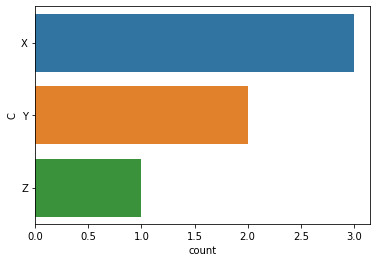

In [33]:
sns.countplot(y="C", data=df,
              order = df['C'].value_counts().iloc[:10].index)
plt.savefig('C.png')

In [119]:
sum(df['B']!=df2['B'])

2

In [114]:
df2['B']

0    1
1    2
2    4
3    2
4    3
5    6
Name: B, dtype: int64

In [134]:
dfnew = df.merge(df2, how = 'outer' ,indicator='check').loc[lambda x : x['_merge']=='right_only']


In [135]:
dfnew

,A,B,D,C,_merge,check
0,foo,11000,1,X,right_only,both
1,bar,4,5,Y,right_only,both


In [74]:
fl= df.groupby(['A','C']).size().to_frame('countl')

In [78]:
fl

countl
A   C        
Zi  Z       1
bar X       1
    Y       1
foo X       2
    Y       1

In [77]:
fl.value_counts()

countl
1         4
2         1
dtype: int64

In [158]:
 fm=df.groupby(['A','C']).size().to_frame('countl').reset_index().merge(df,on=['A', 'C'],how='right').fillna(value=0)#works

In [198]:
fm['meancount']= fm.groupby(["A"])['countl'].transform('mean')#70

In [199]:
fm

,A,C,countl,B,D,maxcount,meancount
0,foo,X,2,1,1,1.666667,1.666667
1,foo,X,2,2,2,1.666667,1.666667
2,bar,Y,1,3,5,1.000000,1.000000
3,bar,X,1,2,2,1.000000,1.000000
4,foo,Y,1,3,3,1.666667,1.666667
5,Zi,Z,1,6,7,1.000000,1.000000


In [169]:
fmh = fm.loc[fm['countl']==fm['maxcount']]

In [170]:
fmh 

,A,C,countl,B,D,maxcount
0,foo,X,2,1,1,2
1,foo,X,2,2,2,2
2,bar,Y,1,3,5,1
3,bar,X,1,2,2,1
5,Zi,Z,1,6,7,1


In [171]:
v=fmh.sort_values('D', ascending=False).drop_duplicates(subset=['A','maxcount'])###yes!!!

In [172]:
v

,A,C,countl,B,D,maxcount
5,Zi,Z,1,6,7,1
2,bar,Y,1,3,5,1
1,foo,X,2,2,2,2


In [173]:
v.loc[v.A=='bar']#70

,A,C,countl,B,D,maxcount
2,bar,Y,1,3,5,1


In [174]:
#fm.sort_values('count').drop_duplicates(['A','C'], keep='first')

In [190]:
n=fm.groupby(['A', 'C'])['D'].quantile([ 0.75]).reset_index()


In [191]:
n


,A,C,level_2,D
0,Zi,Z,0.75,7.00
1,bar,X,0.75,2.00
2,bar,Y,0.75,5.00
3,foo,X,0.75,1.75
4,foo,Y,0.75,3.00


In [179]:
fm= df.groupby(["A"])["C"].value_counts()

In [ ]:
#pd.merge(df, f_maj, on=['A','C'], how='inner',suffixes=('B','D'))

In [161]:
 f_maj.head()

A    C
Zi   Z    1
bar  X    1
     Y    1
foo  X    2
     Y    1
dtype: int64

see if this works

In [107]:
df_own = df.loc[df['B']==df['D']]

In [108]:
df_own

,A,B,D,C
0,foo,1,1,X
1,foo,2,2,X
3,bar,2,2,X
4,foo,3,3,Y


In [167]:
df['majo']= df.groupby(["A"])["C"].transform('count')#doesnt work for counting x...

In [166]:
df

,A,B,D,C,Lnge-count,majo
0,foo,1,1,X,3,3
1,foo,2,2,X,3,3
2,bar,3,5,Y,2,2
3,bar,2,2,X,2,2
4,foo,3,3,Y,3,3
5,Zi,6,7,Z,1,1


In [110]:
def flag_df(v1,v2,v3,v4,v5):

    if (df[v2] == df[v3]):
        df[v5] = df [v4]
    elif (df[v2] != df[v3]) and (df[v3]>2):
         df[v5] = df[v3]

In [111]:
df_owner = flag_df('A','B','D','C','CC')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [117]:
df2 = df.loc[(df['B'] ==df['D']) | (df['D'] > 7)]


In [119]:
df2

,A,B,D,C
0,foo,1,1,X
1,foo,2,2,X
3,bar,2,2,X
4,foo,3,3,Y


In [101]:
[i for i in df['D']]

[1, 2, 5, 2, 3]

NameError: name 'df' is not defined